In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfm
import matplotlib.pyplot as plt
%matplotlib inline


%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-darkgrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

%load_ext autoreload
%autoreload 2

In [10]:
df = pd.read_csv('data/Aggregated Regions.csv')

In [11]:
#Rename Columns
df.rename(columns = {   "Time": "Year",                        
                        "Country Name":"Region",
                        "Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]":"ATM_per100K",  
                        "GDP (current US$) [NY.GDP.MKTP.CD]": "GDP",
                        "GDP per capita (current US$) [NY.GDP.PCAP.CD]": "GDP_percapita",
                        "GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]":"GDP_percapita_growth",
                        "GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]":"GDP_growth_annualperc",
                        "Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]":"mobile_subscr_per100K"},
                        inplace=True)

#drop null
df = df.drop(['Time Code', 'Country Code'], axis=1)
df = df.drop([403, 404]) #drop strings in the Year Column
df = df.replace(to_replace = '..', value=np.nan, regex=False) #replace all the blank values with nan
df.dropna(subset=['Year', 'ATM_per100K', 'mobile_subscr_per100K'], inplace = True)
#ATM_Per100 = 3350 rows --> remove Nan from Mobile --> 2319 rows

#Casting
df['Year'] = df['Year'].astype(int)
cols = df.columns.drop(['Year','Region'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

#select certain regions of interest
regions = ['Arab World', 'East Asia & Pacific', 'South Asia', 'Sub-Saharan Africa', 'North America', 'European Union', 'World']
df = df[df['Region'].isin(regions)]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 33 to 397
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 89 non-null     object 
 1   Year                   89 non-null     int64  
 2   ATM_per100K            89 non-null     float64
 3   GDP                    89 non-null     float64
 4   GDP_growth_annualperc  89 non-null     float64
 5   GDP_percapita          89 non-null     float64
 6   GDP_percapita_growth   89 non-null     float64
 7   mobile_subscr_per100K  89 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.3+ KB


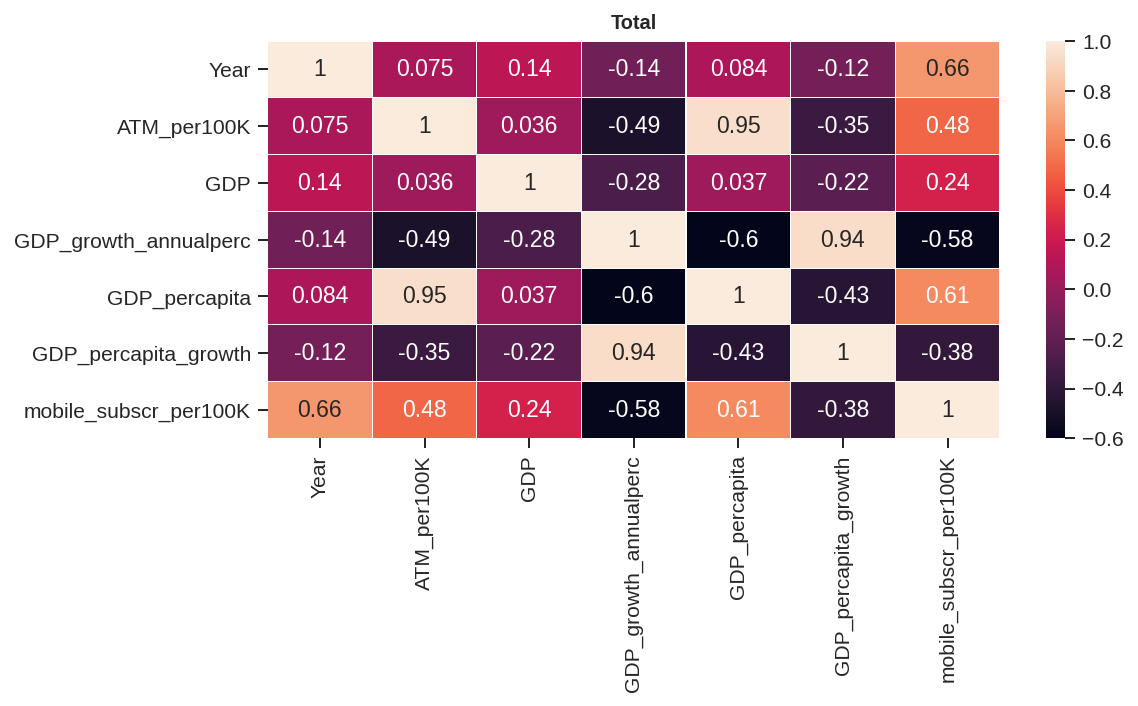

In [13]:
sns.set_context("paper", font_scale = 1.2, rc={"grid.linewidth": 3})
f = plt.figure(figsize=(15, 8))
# _ = f.suptitle('Heat Maps', size=24)
gs = f.add_gridspec(2, 2)

# with sns.axes_style("darkgrid"):
ax = f.add_subplot(gs[0, 0])
ax = sns.heatmap(df.corr(), annot = True, linewidths=.05)
_= ax.set_title('Total', weight='bold', size=10)
f.tight_layout()     
_= plt.savefig('Aggregated Countries Heat_Map')
#High correlation between ATM and GDP_percapita, 

In [14]:
df.Region.unique()

array(['East Asia & Pacific', 'European Union', 'North America',
       'South Asia', 'Sub-Saharan Africa', 'World'], dtype=object)

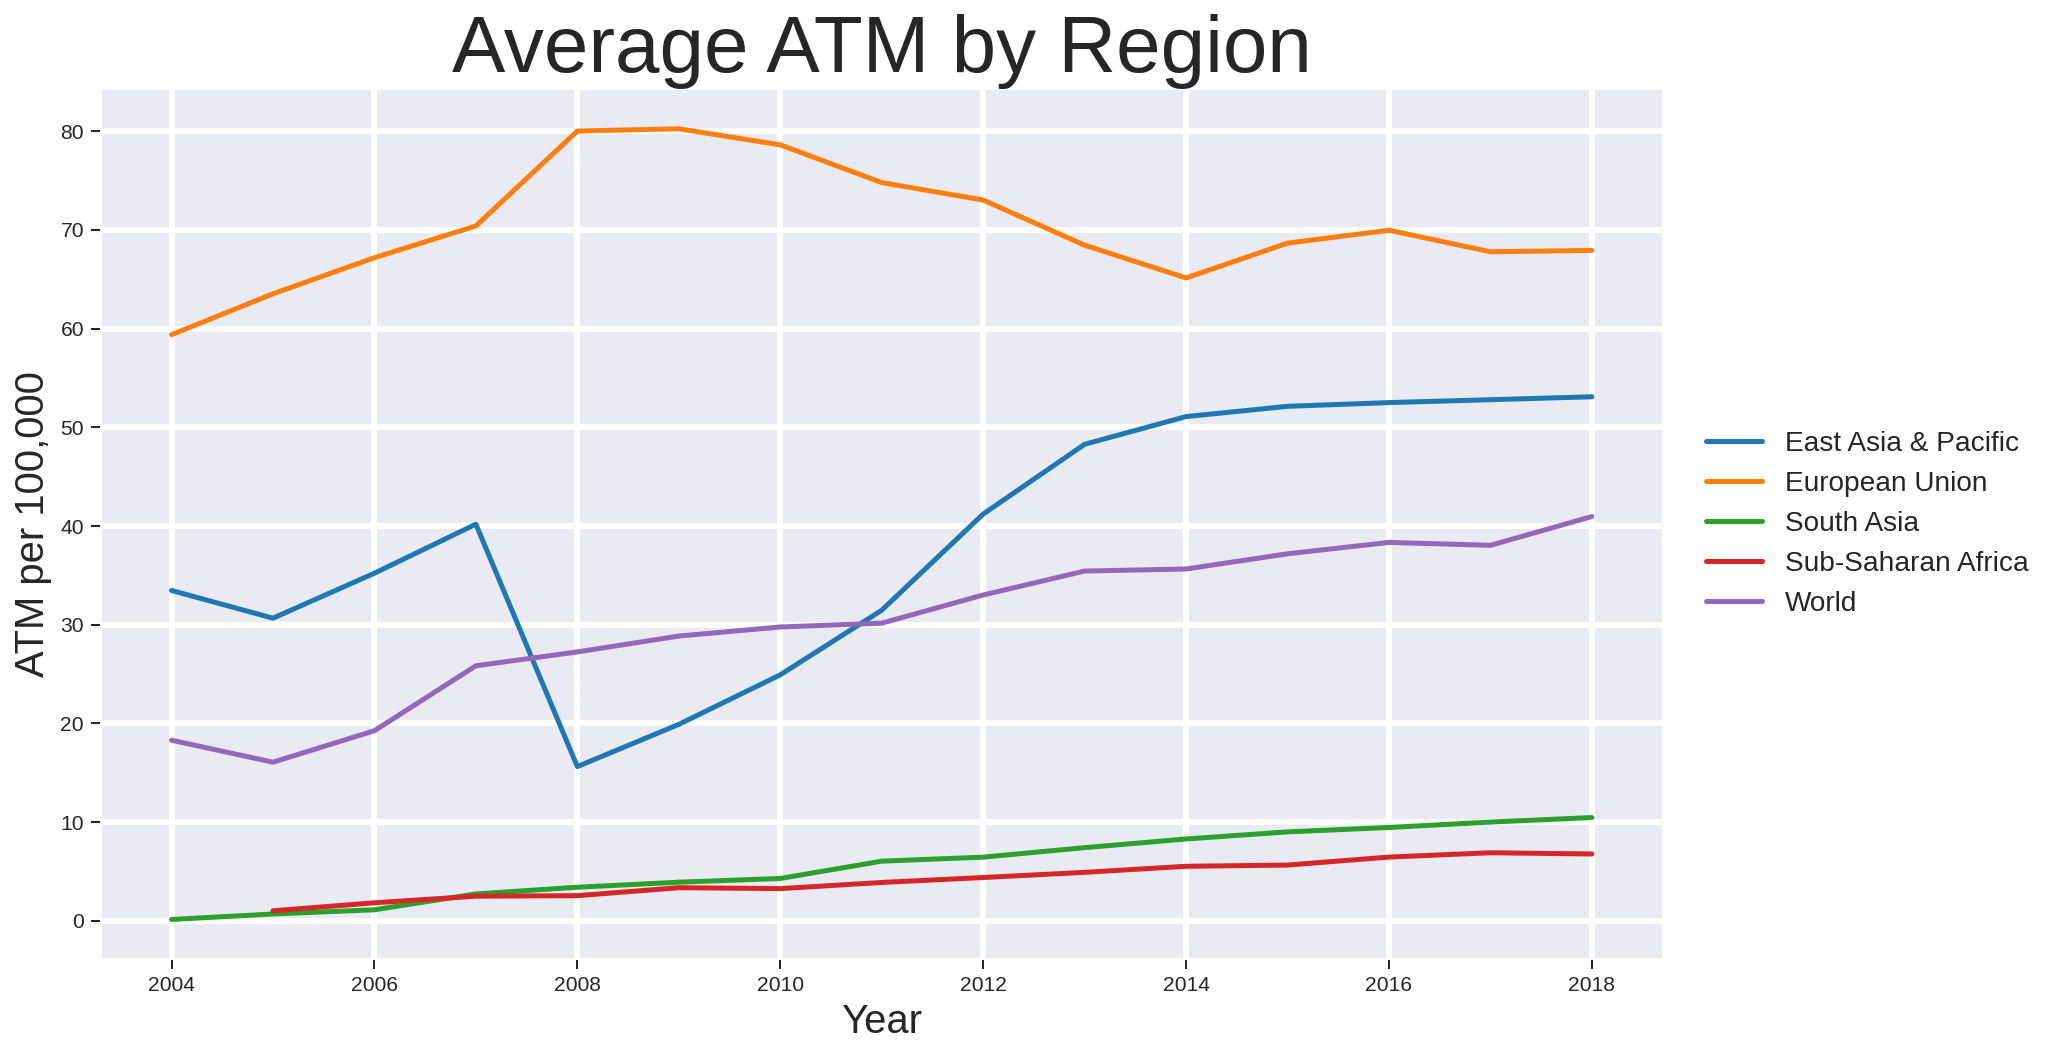

In [15]:
df2 = df[df.Region != 'North America']
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax = df2.groupby(['Region','Year']).mean()['ATM_per100K'].unstack(0).plot.line(lw = 2.5, ax=ax)
_= ax.set_xlabel('Year', fontsize = 20)
_= ax.set_ylabel('ATM per 100,000', fontsize = 20)
_= ax.set_title('Average ATM by Region', fontsize=40)
_= ax.legend(loc='center right', fontsize=14, bbox_to_anchor=(1.25, .5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('ATM Availability by Region', bbox_inches='tight')